##**Lead** **Scoring**
                                                                                        BY :PAWAN RATHI
    
* An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.
The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. <br>
* Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:<br>
* As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.<br>
* X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

###### Importing Important/required Liabraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",200)

###### Reading data leads.csv

In [9]:
Leads_Data=pd.read_csv("leads.csv")

###### Checking size of the data

In [10]:
print("Data Shape is : ",Leads_Data.shape[0],"Rows and",Leads_Data.shape[1],"Columns")

Data Shape is :  9240 Rows and 37 Columns


######Checking info of all available columns

In [11]:
print(Leads_Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Replacing "Select" with NaN values, as those are the values which are not filled in while filling the form

In [12]:
Leads_Data = Leads_Data.replace('Select', np.nan)

###### Checking top rows of data

In [13]:
Leads_Data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified



###### Chekcing Stats of dataset

In [14]:
Leads_Data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


###### Checking for any missing values in columns

In [15]:
Null_values=Leads_Data.isnull().sum()/Leads_Data.shape[0]*100

% Summary of each columns having null values

In [16]:
Null_values.sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

Dropping the columns having null values more than 40%

In [17]:
null_40=(Null_values[Null_values>40]).index.to_list()
Leads_Data.drop(columns=null_40,inplace=True)
print("Application data new shape : ", Leads_Data.shape)

Application data new shape :  (9240, 30)


In [18]:
Leads_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

%Summary of the columns having null values pending after removing the high% null vlaue columns

In [19]:
Null_values=Leads_Data.isnull().sum()/Leads_Data.shape[0]*100
Null_values=Null_values.sort_values(ascending=False)
Null_values

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

List of the columns having null values

In [20]:
Null_values=Null_values[Null_values>0]
Null_values=Null_values.index.to_list()
Null_values

['City',
 'Specialization',
 'Tags',
 'What matters most to you in choosing a course',
 'What is your current occupation',
 'Country',
 'Page Views Per Visit',
 'TotalVisits',
 'Last Activity',
 'Lead Source']

Imputing mode in categorical columns and median in numerical columns at place of null values.

In [21]:
for col in Null_values:
    if Leads_Data[col].dtype=="object":
        Leads_Data[col]=Leads_Data[col].fillna(Leads_Data[col].mode()[0])
    else:
        Leads_Data[col]=Leads_Data[col].fillna(Leads_Data[col].median())

Checking final null values in each column

In [22]:
Leads_Data.isna().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                      

Summary of Unique value count in each column

In [23]:
Leads_Data.nunique().sort_values(ascending=False)

Prospect ID                                      9240
Lead Number                                      9240
Total Time Spent on Website                      1731
Page Views Per Visit                              114
TotalVisits                                        41
Country                                            38
Tags                                               26
Lead Source                                        21
Specialization                                     18
Last Activity                                      17
Last Notable Activity                              16
What is your current occupation                     6
City                                                6
Lead Origin                                         5
What matters most to you in choosing a course       3
Converted                                           2
Do Not Call                                         2
A free copy of Mastering The Interview              2
Through Recommendations     

Columns having 1 unique value, means every value is same, so no use of keeping them, we may drop these

In [24]:
Unique_Count=Leads_Data.nunique()
Single_unique=Unique_Count[Unique_Count==1]
Single_unique=Single_unique.index.to_list()
Single_unique

['Magazine',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

Dropping these columns having single value in column.

In [25]:
Leads_Data.drop(columns=Single_unique,axis=1,inplace=True)
Leads_Data.shape

(9240, 25)

Creating summary having type and unique count to lookinto rest of the fields

In [26]:
Col_Type_With_Unique_Value_Counts=Leads_Data.nunique().sort_values(ascending=False)
Col_Type_With_Unique_Value_Counts=Col_Type_With_Unique_Value_Counts.reset_index()
Col_Type_With_Unique_Value_Counts=Col_Type_With_Unique_Value_Counts.rename(columns={"index":"Col_name",0:"unique_val_count"})
Col_Type_With_Unique_Value_Counts["dtype"]=Col_Type_With_Unique_Value_Counts["Col_name"].apply(lambda x: Leads_Data[x].dtype)
Col_Type_With_Unique_Value_Counts

,Col_name,unique_val_count,dtype
0,Prospect ID,9240,object
1,Lead Number,9240,int64
2,Total Time Spent on Website,1731,int64
3,Page Views Per Visit,114,float64
4,TotalVisits,41,float64
5,Country,38,object
6,Tags,26,object
7,Lead Source,21,object
8,Specialization,18,object
9,Last Activity,17,object


Dropping columns having unique values, as every value is different and ID types, these may not help keeping in the database. we should remove these.

In [27]:
Leads_Data.drop(columns=["Prospect ID","Lead Number"],inplace=True)

Lest see the count of values in every column to check imbalance

In [28]:
for col in Leads_Data:
    print(Leads_Data[col].value_counts())
    print("---------------------------------------------------------------")

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
---------------------------------------------------------------
Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64
---------------------------------------------------------------
No     8506
Yes     734
Name: Do Not Email, dtype: int64
---------------------------------------------

These columns have almost same values(except handful different), we may drop these columns

In [29]:
Leads_Data.drop(columns=["Do Not Call","Through Recommendations","Digital Advertisement","Newspaper","X Education Forums","Newspaper Article","Search","What matters most to you in choosing a course"],inplace=True)

Creating list of Categorical and numerical columns, which will help us in EDA

In [30]:
cat_cols=Leads_Data.select_dtypes(include="object").columns.to_list()
num_cols=Leads_Data.select_dtypes(include=["float64","int64"]).columns.to_list()
num_cols.remove("Converted")

Summary of Leads converted and not converted

In [31]:
Leads_Data.Converted.value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

In [32]:
Leads_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Country                                 9240 non-null   object 
 9   Specialization                          9240 non-null   object 
 10  What is your current occupation         9240 non-null   obje

Correlation between numerical features

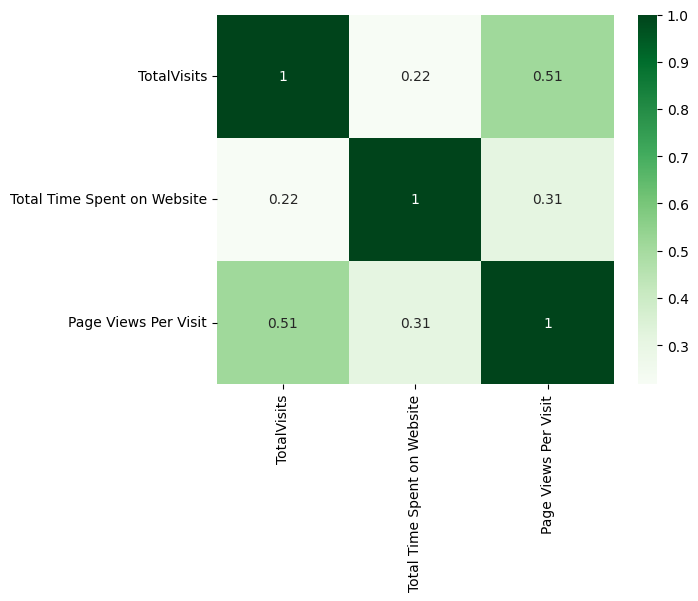

In [33]:
sns.heatmap(data=Leads_Data[num_cols].corr(),cmap='Greens',annot=True)
plt.show()

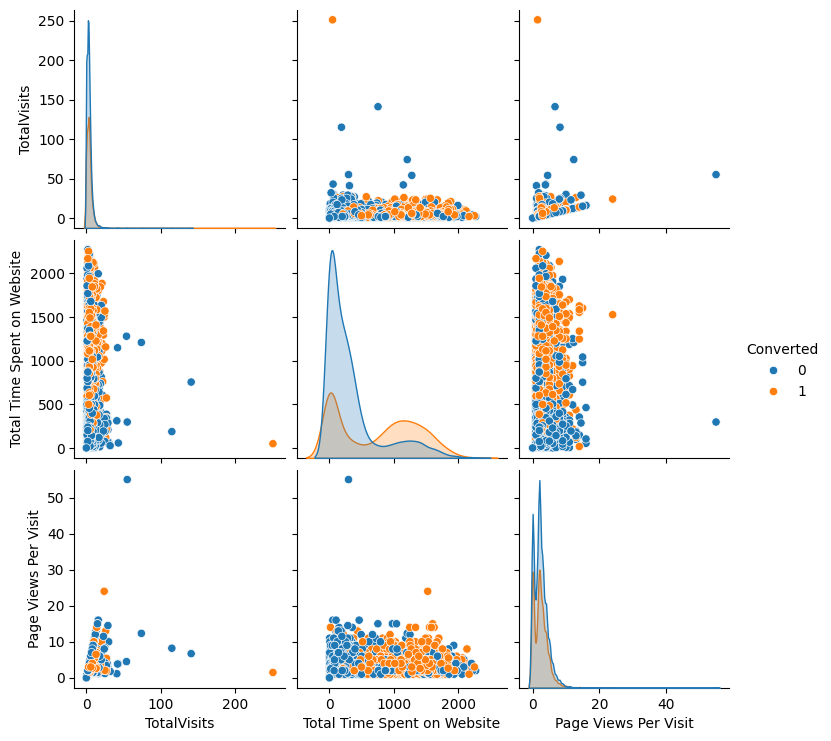

In [34]:
sns.pairplot(data=Leads_Data,diag_kind='kde',hue='Converted')
plt.show()

Checking outliers in numerical features

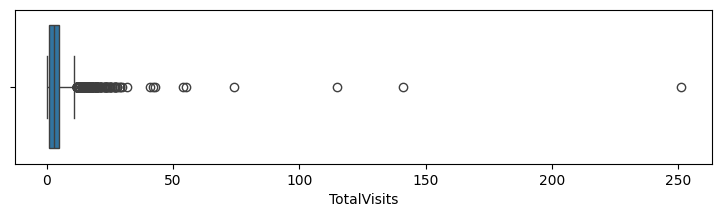

------------------------------------------------------------------------------------------


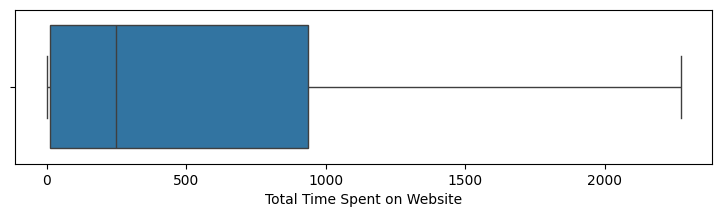

------------------------------------------------------------------------------------------


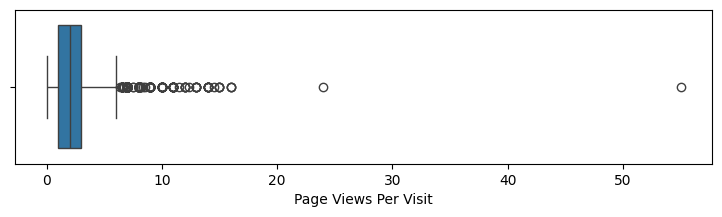

------------------------------------------------------------------------------------------


In [35]:
for col in num_cols:
    plt.figure(figsize=(9,2))
    sns.boxplot(x=Leads_Data[col])
    plt.show()
    print("-"*90)

Comparison of leads converted for each categorical feature

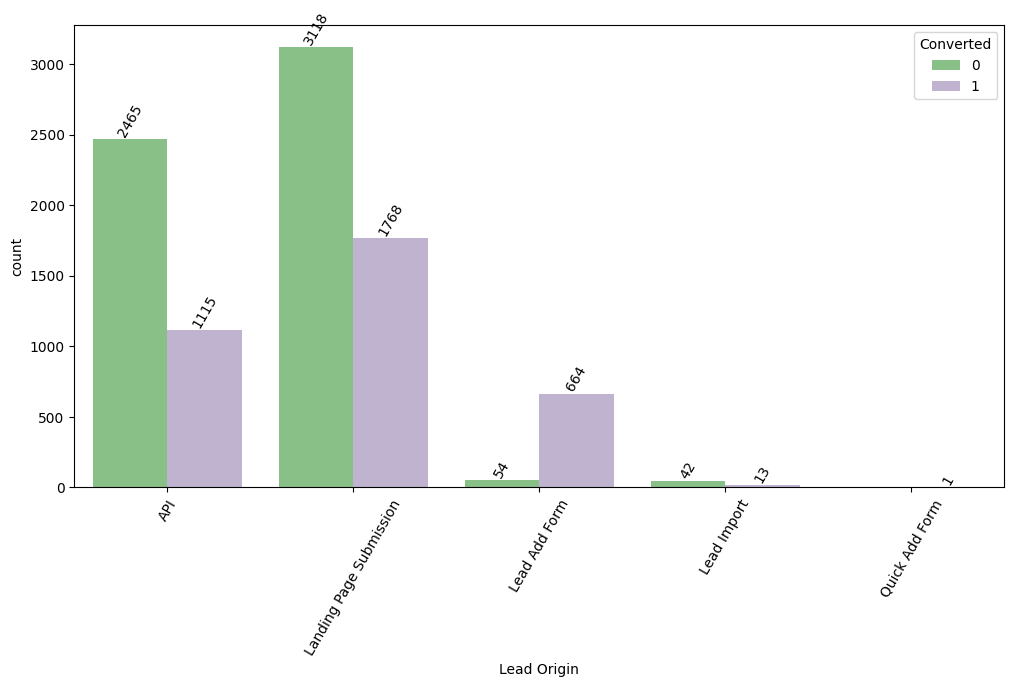

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


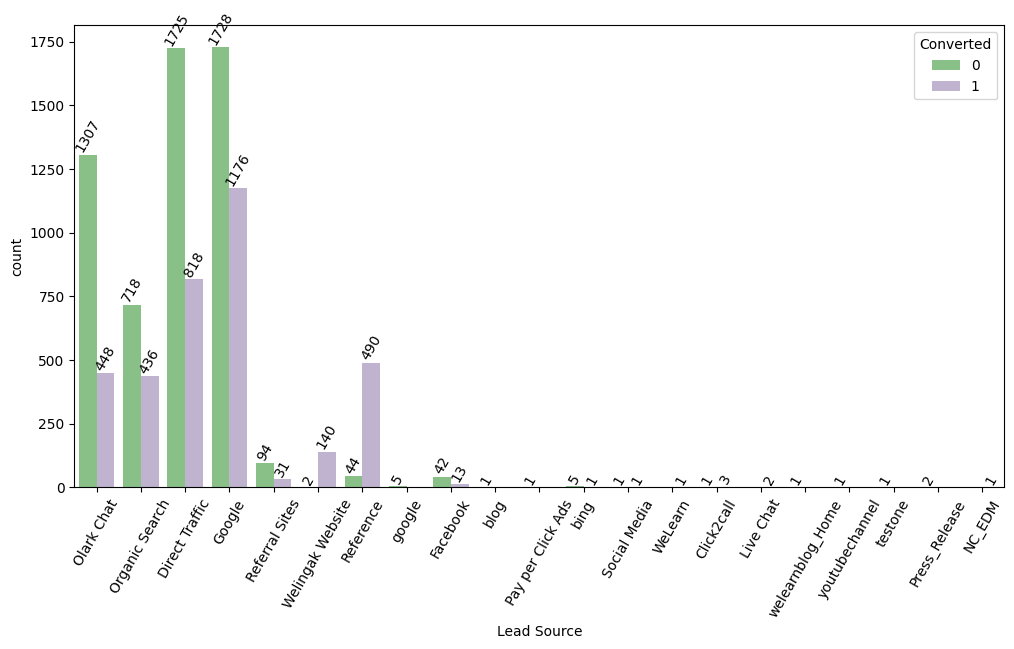

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


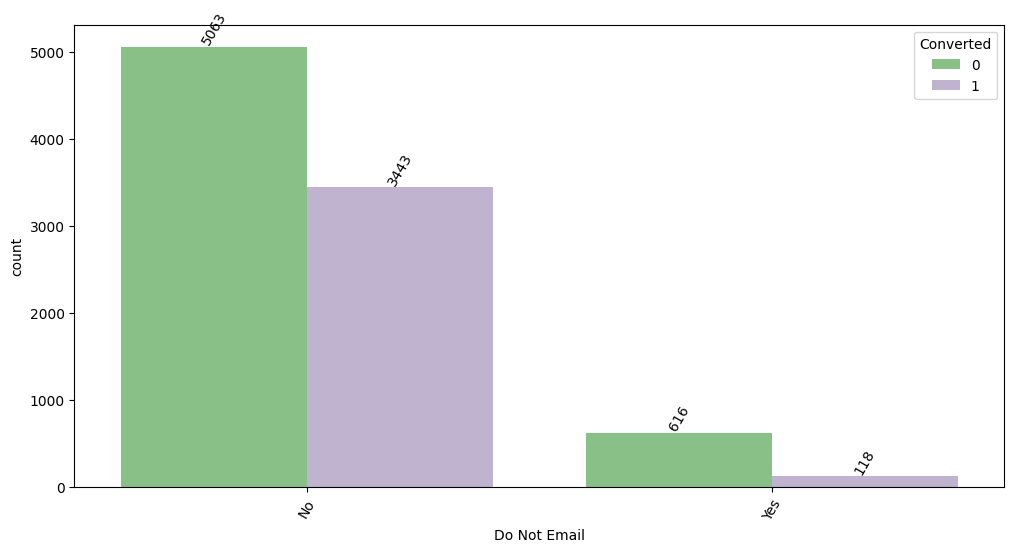

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


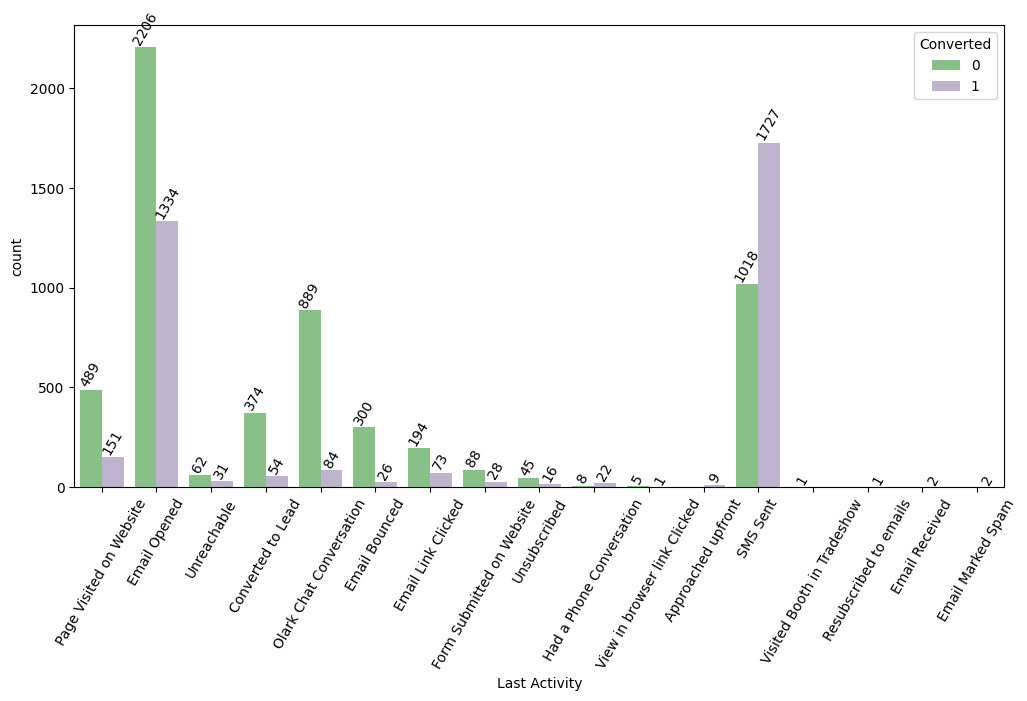

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


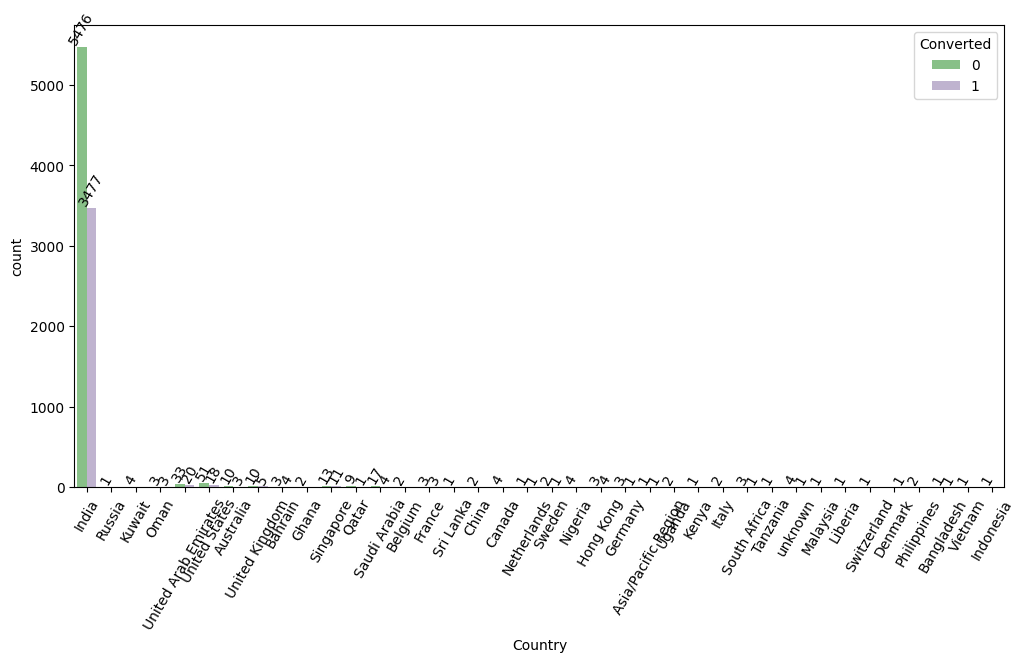

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


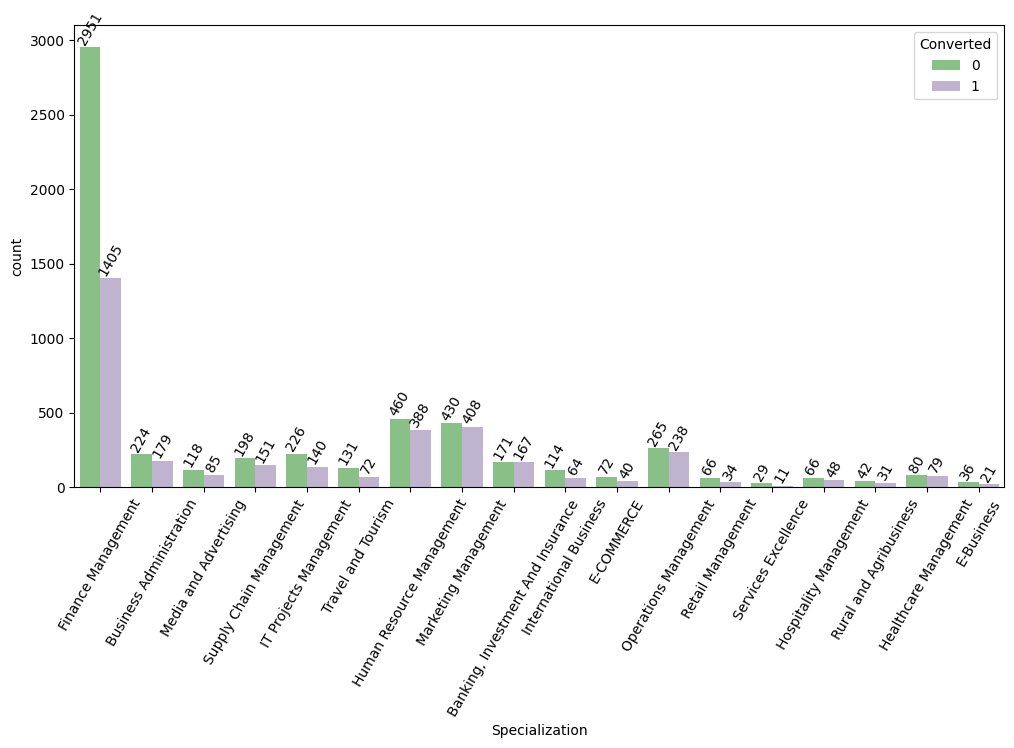

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


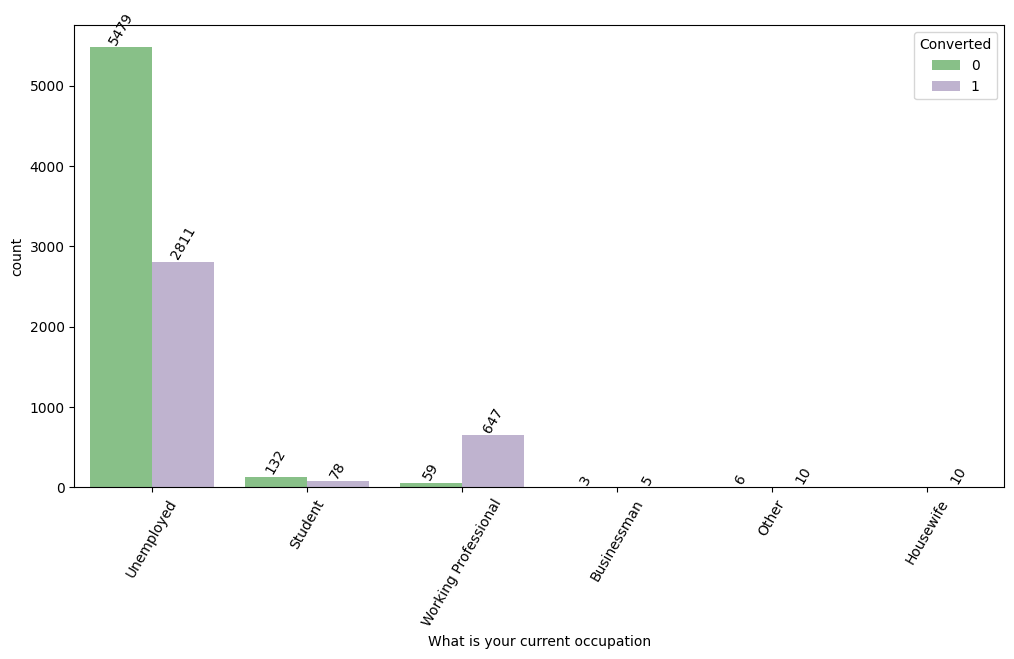

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


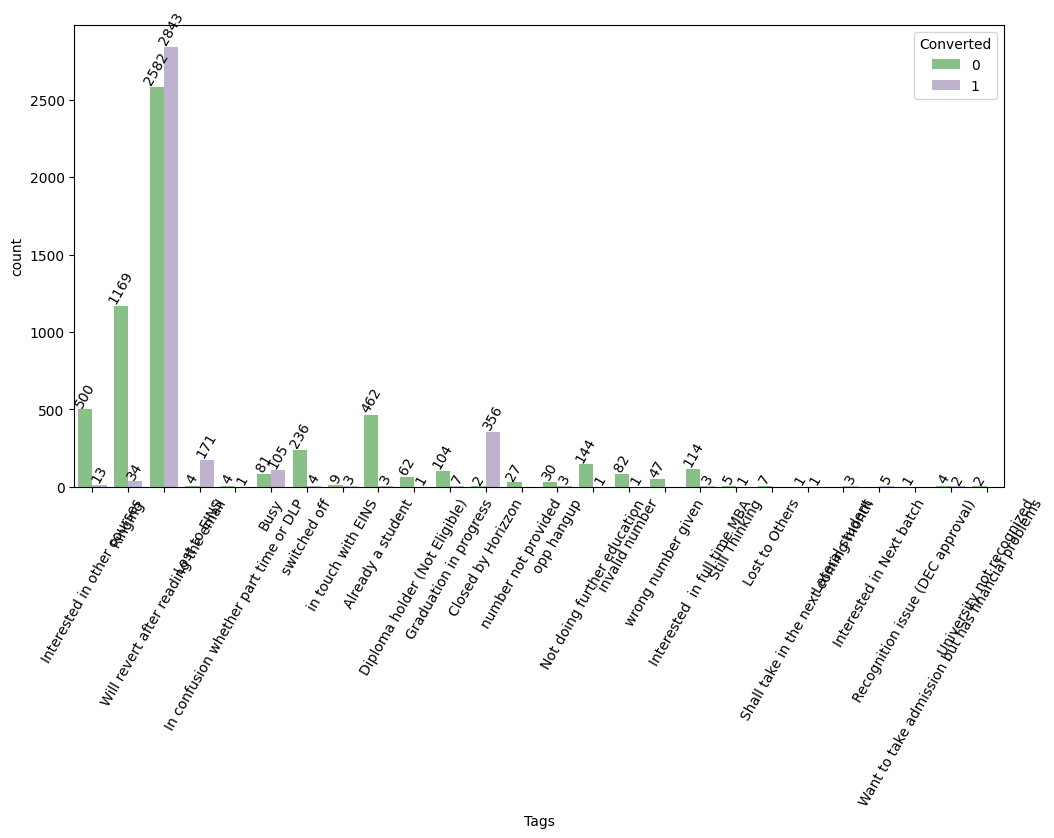

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


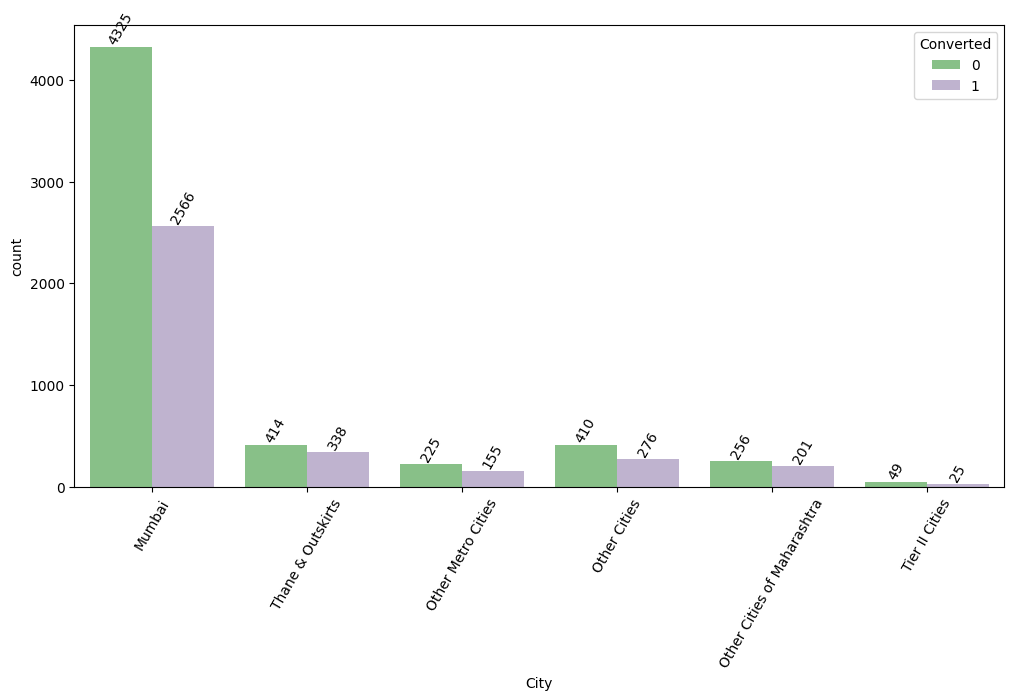

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


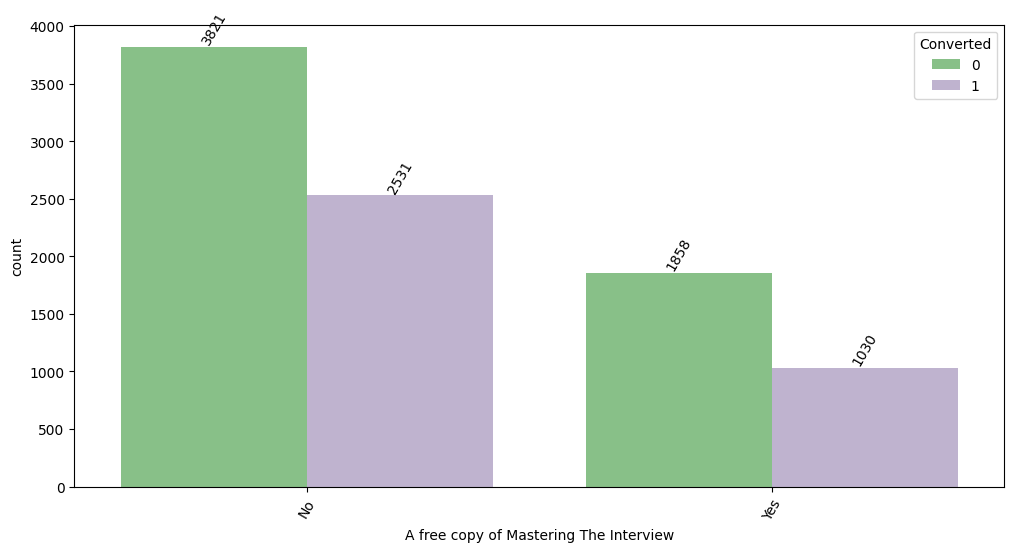

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


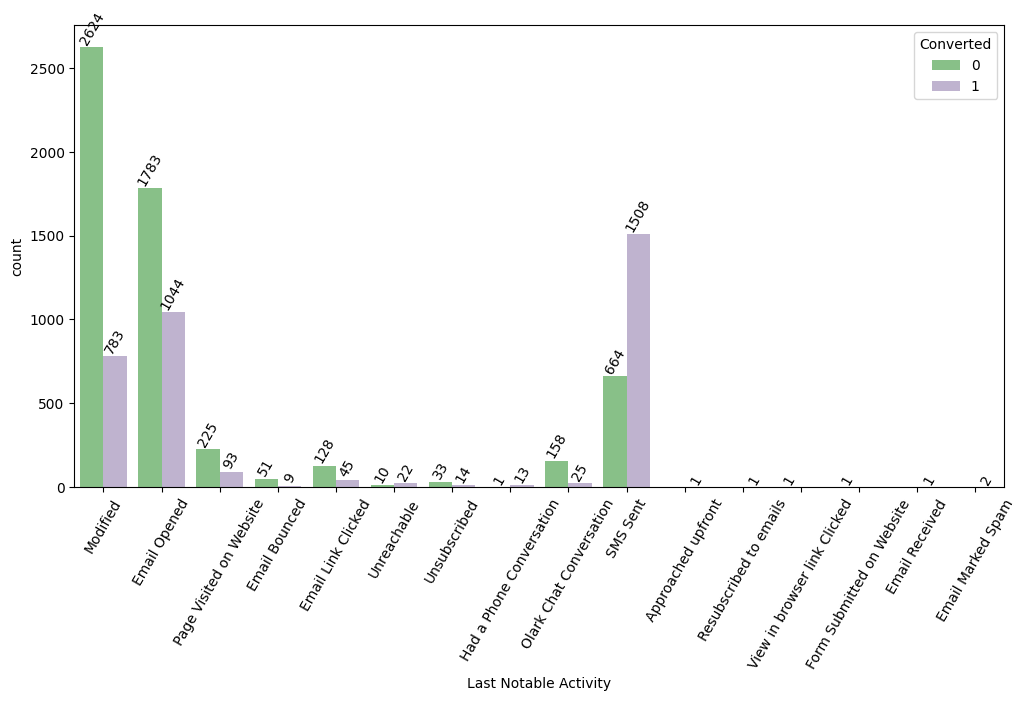

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


In [36]:
for col in cat_cols:
    plt.figure(figsize=(12,6))
    ax=sns.countplot(data=Leads_Data,x=col,palette='Accent',hue=Leads_Data.Converted)
    for x in ax.containers:
        ax.bar_label(x,rotation=60)
    plt.xticks(rotation=60)
    plt.show()
    print("X"*120)

## Data Prepration for model building

In [37]:
Leads_Data = pd.get_dummies(data=Leads_Data,columns=cat_cols,drop_first=True)

Converting dummy boolean column to int type

In [38]:
cols=Leads_Data.columns.to_list()
for col in cols:
    if Leads_Data[col].dtype=="bool":
        Leads_Data[col]=Leads_Data[col].astype("uint8")


In [39]:
Leads_Data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last 

In [40]:
Leads_Data.columns.to_list()

['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Lead Origin_Lead Import',
 'Lead Origin_Quick Add Form',
 'Lead Source_Direct Traffic',
 'Lead Source_Facebook',
 'Lead Source_Google',
 'Lead Source_Live Chat',
 'Lead Source_NC_EDM',
 'Lead Source_Olark Chat',
 'Lead Source_Organic Search',
 'Lead Source_Pay per Click Ads',
 'Lead Source_Press_Release',
 'Lead Source_Reference',
 'Lead Source_Referral Sites',
 'Lead Source_Social Media',
 'Lead Source_WeLearn',
 'Lead Source_Welingak Website',
 'Lead Source_bing',
 'Lead Source_blog',
 'Lead Source_google',
 'Lead Source_testone',
 'Lead Source_welearnblog_Home',
 'Lead Source_youtubechannel',
 'Do Not Email_Yes',
 'Last Activity_Converted to Lead',
 'Last Activity_Email Bounced',
 'Last Activity_Email Link Clicked',
 'Last Activity_Email Marked Spam',
 'Last Activity_Email Opened',
 'Last Activity_Email Received',
 'Last Activ

In [41]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

New Shape of dataset

In [42]:
Leads_Data.shape

(9240, 150)

Seperating Dependent and non dependent columns for splitting the train and test data

In [43]:
y =Leads_Data['Converted']
X=Leads_Data.drop('Converted', axis=1)

In [44]:
#Train Test split with 70:30 ratio
X_train, X_test,y_train,y_test = train_test_split(X,y,train_size=0.7, random_state=100)

In [45]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6468, 149)
(2772, 149)
(6468,)
(2772,)


Let us scale continuous variables and Fit and transform training set only

In [46]:
scaler=StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Ac

In [47]:
X_train.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Ac

In [48]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Ac

In [49]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE

lets find the top 15 features which may has correlation with the target feature

In [50]:
rfe = RFE(logreg, n_features_to_select=20)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [51]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', False, 85),
 ('Total Time Spent on Website', False, 7),
 ('Page Views Per Visit', False, 102),
 ('Lead Origin_Landing Page Submission', False, 24),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 90),
 ('Lead Origin_Quick Add Form', False, 69),
 ('Lead Source_Direct Traffic', False, 77),
 ('Lead Source_Facebook', False, 71),
 ('Lead Source_Google', False, 81),
 ('Lead Source_Live Chat', False, 100),
 ('Lead Source_NC_EDM', False, 47),
 ('Lead Source_Olark Chat', False, 34),
 ('Lead Source_Organic Search', False, 83),
 ('Lead Source_Pay per Click Ads', False, 120),
 ('Lead Source_Press_Release', False, 80),
 ('Lead Source_Reference', False, 41),
 ('Lead Source_Referral Sites', False, 82),
 ('Lead Source_Social Media', False, 33),
 ('Lead Source_WeLearn', False, 73),
 ('Lead Source_Welingak Website', False, 2),
 ('Lead Source_bing', False, 115),
 ('Lead Source_blog', False, 39),
 ('Lead Source_google', False, 35),
 ('Lead Source_testone', Fal

In [52]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [53]:
#Print Columns selected by RFE. We will manually eliminate for these columns
X_train_rfe=X_train.columns[rfe.support_].tolist()
print(X_train_rfe)

['Lead Origin_Lead Add Form', 'Do Not Email_Yes', 'Last Activity_Converted to Lead', 'Last Activity_Olark Chat Conversation', 'What is your current occupation_Unemployed', 'What is your current occupation_Working Professional', 'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Interested in Next batch', 'Tags_Lateral student', 'Tags_Lost to EINS', 'Tags_Ringing', 'Tags_Will revert after reading the email', 'Tags_in touch with EINS', 'Tags_invalid number', 'Tags_switched off', 'Tags_wrong number given', 'Last Notable Activity_Email Bounced', 'Last Notable Activity_Had a Phone Conversation', 'Last Notable Activity_SMS Sent']


In [54]:
# Features not selected by RFE
X_train_rfe_exlusion=X_train.columns[~rfe.support_].tolist()
print(X_train_rfe_exlusion)

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic', 'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM', 'Lead Source_Olark Chat', 'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release', 'Lead Source_Reference', 'Lead Source_Referral Sites', 'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_Welingak Website', 'Lead Source_bing', 'Lead Source_blog', 'Lead Source_google', 'Lead Source_testone', 'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel', 'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam', 'Last Activity_Email Opened', 'Last Activity_Email Received', 'Last Activity_Form Submitted on Website', 'Last Activity_Had a Phone Conversation', 'Last Activity_Page Visited on Website', 'Last Activity_Re

In [55]:
#Selected columns for Model 1 - all columns selected by RFE
rfe_cols=['Lead Origin_Lead Add Form', 'Do Not Email_Yes',
             'Last Activity_Converted to Lead',
             'Last Activity_Olark Chat Conversation',
             'What is your current occupation_Unemployed',
             'What is your current occupation_Working Professional',
             'Tags_Busy', 'Tags_Closed by Horizzon',
             'Tags_Interested in Next batch', 'Tags_Lateral student',
             'Tags_Lost to EINS', 'Tags_Ringing', 'Tags_Will revert after reading the email',
             'Tags_in touch with EINS', 'Tags_invalid number',
             'Tags_switched off', 'Tags_wrong number given',
             'Last Notable Activity_Email Bounced', 'Last Notable Activity_Had a Phone Conversation',
             'Last Notable Activity_SMS Sent']
X_train_sm = sm.add_constant(X_train[rfe_cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
print(res.summary())
get_vif(rfe_cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2039.7
Date:                Mon, 18 Mar 2024   Deviance:                       4079.4
Time:                        12:58:15   Pearson chi2:                 1.20e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5027
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Drop "Tags_Interested in Next batch " due to High P-Score

In [56]:
rfe_cols=['Lead Origin_Lead Add Form', 'Do Not Email_Yes',
             'Last Activity_Converted to Lead',
             'Last Activity_Olark Chat Conversation',
             'What is your current occupation_Unemployed',
             'What is your current occupation_Working Professional',
             'Tags_Busy', 'Tags_Closed by Horizzon',
              'Tags_Lateral student',
             'Tags_Lost to EINS', 'Tags_Ringing', 'Tags_Will revert after reading the email',
             'Tags_in touch with EINS', 'Tags_invalid number',
             'Tags_switched off', 'Tags_wrong number given',
             'Last Notable Activity_Email Bounced', 'Last Notable Activity_Had a Phone Conversation',
             'Last Notable Activity_SMS Sent']
X_train_sm = sm.add_constant(X_train[rfe_cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
print(res.summary())
get_vif(rfe_cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2048.0
Date:                Mon, 18 Mar 2024   Deviance:                       4095.9
Time:                        12:58:16   Pearson chi2:                 1.20e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.5015
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Drop "Tags_Lateral student" due to High P-Score

In [57]:
rfe_cols=['Lead Origin_Lead Add Form', 'Do Not Email_Yes',
             'Last Activity_Converted to Lead',
             'Last Activity_Olark Chat Conversation',
             'What is your current occupation_Unemployed',
             'What is your current occupation_Working Professional',
             'Tags_Busy', 'Tags_Closed by Horizzon',
             'Tags_Lost to EINS', 'Tags_Ringing', 'Tags_Will revert after reading the email',
             'Tags_in touch with EINS', 'Tags_invalid number',
             'Tags_switched off', 'Tags_wrong number given',
             'Last Notable Activity_Email Bounced', 'Last Notable Activity_Had a Phone Conversation',
             'Last Notable Activity_SMS Sent']
X_train_sm = sm.add_constant(X_train[rfe_cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
print(res.summary())
get_vif(rfe_cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2055.9
Date:                Mon, 18 Mar 2024   Deviance:                       4111.7
Time:                        12:58:17   Pearson chi2:                 1.19e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.5003
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Drop "Tags_wrong number given" due to High P-Score

In [58]:
rfe_cols=['Lead Origin_Lead Add Form', 'Do Not Email_Yes',
             'Last Activity_Converted to Lead',
             'Last Activity_Olark Chat Conversation',
             'What is your current occupation_Unemployed',
             'What is your current occupation_Working Professional',
             'Tags_Busy', 'Tags_Closed by Horizzon',
             'Tags_Lost to EINS', 'Tags_Ringing', 'Tags_Will revert after reading the email',
             'Tags_in touch with EINS', 'Tags_invalid number',
             'Tags_switched off',
             'Last Notable Activity_Email Bounced', 'Last Notable Activity_Had a Phone Conversation',
             'Last Notable Activity_SMS Sent']
X_train_sm = sm.add_constant(X_train[rfe_cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
print(res.summary())
get_vif(rfe_cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2057.9
Date:                Mon, 18 Mar 2024   Deviance:                       4115.8
Time:                        12:58:17   Pearson chi2:                 1.20e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4999
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Drop "Tags_invalid number" due to High P-Score

In [59]:
rfe_cols=['Lead Origin_Lead Add Form', 'Do Not Email_Yes',
             'Last Activity_Converted to Lead',
             'Last Activity_Olark Chat Conversation',
             'What is your current occupation_Unemployed',
             'What is your current occupation_Working Professional',
             'Tags_Busy', 'Tags_Closed by Horizzon',
             'Tags_Lost to EINS', 'Tags_Ringing', 'Tags_Will revert after reading the email',
             'Tags_in touch with EINS',
             'Tags_switched off',
             'Last Notable Activity_Email Bounced', 'Last Notable Activity_Had a Phone Conversation',
             'Last Notable Activity_SMS Sent']
X_train_sm = sm.add_constant(X_train[rfe_cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
print(res.summary())
get_vif(rfe_cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2059.9
Date:                Mon, 18 Mar 2024   Deviance:                       4119.7
Time:                        12:58:18   Pearson chi2:                 1.21e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4996
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Drop "Last Notable Activity_Had a Phone Conversation" due to High P-Score

In [60]:
rfe_cols=['Lead Origin_Lead Add Form', 'Do Not Email_Yes',
             'Last Activity_Converted to Lead',
             'Last Activity_Olark Chat Conversation',
             'What is your current occupation_Unemployed',
             'What is your current occupation_Working Professional',
             'Tags_Busy', 'Tags_Closed by Horizzon',
             'Tags_Lost to EINS', 'Tags_Ringing', 'Tags_Will revert after reading the email',
             'Tags_in touch with EINS',
             'Tags_switched off',
             'Last Notable Activity_Email Bounced',
             'Last Notable Activity_SMS Sent']
X_train_sm = sm.add_constant(X_train[rfe_cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
print(res.summary())
get_vif(rfe_cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2066.8
Date:                Mon, 18 Mar 2024   Deviance:                       4133.6
Time:                        12:58:18   Pearson chi2:                 1.20e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4986
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Drop "Tags_switched off" due to High P-Score

In [61]:
rfe_cols=['Lead Origin_Lead Add Form', 'Do Not Email_Yes',
             'Last Activity_Converted to Lead',
             'Last Activity_Olark Chat Conversation',
             'What is your current occupation_Unemployed',
             'What is your current occupation_Working Professional',
             'Tags_Busy', 'Tags_Closed by Horizzon',
             'Tags_Lost to EINS', 'Tags_Ringing', 'Tags_Will revert after reading the email',
             'Tags_in touch with EINS',
             'Last Notable Activity_Email Bounced',
             'Last Notable Activity_SMS Sent']
X_train_sm = sm.add_constant(X_train[rfe_cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
print(res.summary())
get_vif(rfe_cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2071.6
Date:                Mon, 18 Mar 2024   Deviance:                       4143.2
Time:                        12:58:19   Pearson chi2:                 1.15e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4978
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Drop "Last Notable Activity_Email Bounced" due to High P-Score

In [62]:
rfe_cols=['Lead Origin_Lead Add Form', 'Do Not Email_Yes',
             'Last Activity_Converted to Lead',
             'Last Activity_Olark Chat Conversation',
             'What is your current occupation_Unemployed',
             'What is your current occupation_Working Professional',
             'Tags_Busy', 'Tags_Closed by Horizzon',
             'Tags_Lost to EINS', 'Tags_Ringing', 'Tags_Will revert after reading the email',
             'Tags_in touch with EINS',
             'Last Notable Activity_SMS Sent']
X_train_sm = sm.add_constant(X_train[rfe_cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
print(res.summary())
get_vif(rfe_cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2075.5
Date:                Mon, 18 Mar 2024   Deviance:                       4151.1
Time:                        12:58:20   Pearson chi2:                 1.15e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4972
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Drop "Tags_Ringing" due to High P-Score

In [63]:
rfe_cols=['Lead Origin_Lead Add Form', 'Do Not Email_Yes',
             'Last Activity_Converted to Lead',
             'Last Activity_Olark Chat Conversation',
             'What is your current occupation_Unemployed',
             'What is your current occupation_Working Professional',
             'Tags_Busy', 'Tags_Closed by Horizzon',
             'Tags_Lost to EINS', 'Tags_Will revert after reading the email',
             'Tags_in touch with EINS',
             'Last Notable Activity_SMS Sent']
X_train_sm = sm.add_constant(X_train[rfe_cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
print(res.summary())
get_vif(rfe_cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2081.7
Date:                Mon, 18 Mar 2024   Deviance:                       4163.3
Time:                        12:58:20   Pearson chi2:                 1.20e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4963
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

All p-scores and VIF are low now, we can proceed with these features now.

Predicting dependent variable on train data.

In [64]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.009991
6795    0.387825
3516    0.009991
8105    0.096606
3934    0.387825
4844    0.993029
3297    0.009991
8071    0.999956
987     0.150229
7423    0.870344
dtype: float64

Predicting dependent variable on train data.

In [65]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00999142, 0.38782524, 0.00999142, 0.09660584, 0.38782524,
       0.99302886, 0.00999142, 0.99995588, 0.15022918, 0.870344  ])

Creating new dataframe having Converted status and predicted status

In [66]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.009991,1871
1,0,0.387825,6795
2,0,0.009991,3516
3,0,0.096606,8105
4,0,0.387825,3934


Predicting dependent variable on train data.

In [67]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.009991,1871,0
1,0,0.387825,6795,0
2,0,0.009991,3516,0
3,0,0.096606,8105,0
4,0,0.387825,3934,0


Generating Confusion matrix

In [68]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3859  143]
 [ 769 1697]]


Let's check the overall accuracy.

In [69]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8589981447124304


In [70]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

Let's see the sensitivity of our logistic regression model

In [71]:
TP / float(TP+FN)

0.6881589618815896

Let us calculate specificity

In [72]:
TN / float(TN+FP)

0.9642678660669665

Calculate False Postive Rate - predicting conversion when customer does not have convert

In [73]:
print(FP/ float(TN+FP))

0.03573213393303348


positive predictive value

In [74]:
print (TP / float(TP+FP))

0.9222826086956522


Negative predictive value

In [75]:
print (TN / float(TN+ FN))

0.833837510803803


##### PLOTTING ROC CURVE

In [76]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [77]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

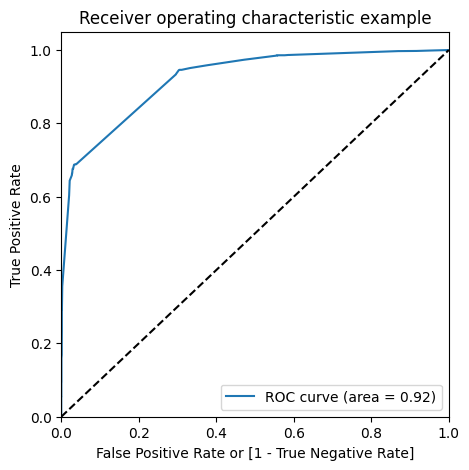

In [78]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The ROC Curve should be a value close to 1. We are getting a good value of 0.92 indicating a good predictive model.

##### Finding Optimal Cutoff Point

Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that:

In [79]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.009991,1871,0,1,0,0,0,0,0,0,0,0,0
1,0,0.387825,6795,0,1,1,1,1,0,0,0,0,0,0
2,0,0.009991,3516,0,1,0,0,0,0,0,0,0,0,0
3,0,0.096606,8105,0,1,0,0,0,0,0,0,0,0,0
4,0,0.387825,3934,0,1,1,1,1,0,0,0,0,0,0


Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

In [80]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)


     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.750928  0.958637  0.622939
0.2   0.2  0.790662  0.946067  0.694903
0.3   0.3  0.791899  0.934307  0.704148
0.4   0.4  0.858534  0.688564  0.963268
0.5   0.5  0.858998  0.688159  0.964268
0.6   0.6  0.859462  0.683293  0.968016
0.7   0.7  0.857761  0.673966  0.971014
0.8   0.8  0.850804  0.643958  0.978261
0.9   0.9  0.752474  0.354826  0.997501


Let's plot accuracy sensitivity and specificity for various probabilities.

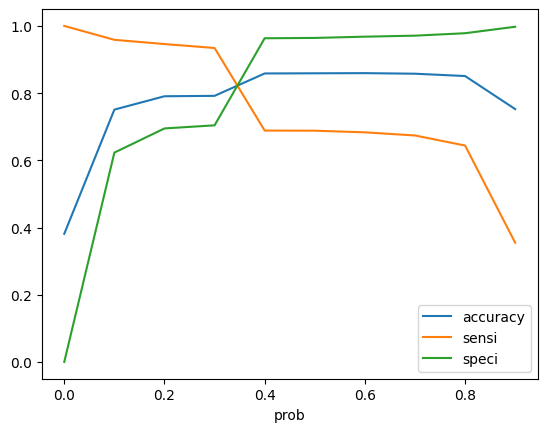

In [81]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [82]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.009991,1871,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.387825,6795,0,1,1,1,1,0,0,0,0,0,0,1
2,0,0.009991,3516,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.096606,8105,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.387825,3934,0,1,1,1,1,0,0,0,0,0,0,1


In [83]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.009991,1871,0,1
1,0,0.387825,6795,1,39
2,0,0.009991,3516,0,1
3,0,0.096606,8105,0,10
4,0,0.387825,3934,1,39


Let's check the overall accuracy.

In [84]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7917439703153989

In [85]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[2819, 1183],
       [ 164, 2302]])

In [86]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

Let's see the sensitivity of our logistic regression model

In [87]:
TP / float(TP+FN)

0.9334955393349554

Let us calculate specificity

In [88]:
TN / float(TN+FP)

0.7043978010994503

Observation:

So as we can see above the model seems to be performing well. The ROC curve has a value of 0.92, which is very good. We have the following values for the Train Data:


Accuracy : 79.17%

Sensitivity : 93.34%

Specificity : 70.43%

Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall.

Calculate False Postive Rate - predicting conversion when customer does not have convert

In [89]:
print(FP/ float(TN+FP))

0.29560219890054973


Positive predictive value

In [90]:
print (TP / float(TP+FP))

0.660545193687231


Negative predictive value

In [91]:
print (TN / float(TN+ FN))

0.9450217901441502


Looking at the confusion matrix again

In [92]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[2819, 1183],
       [ 164, 2302]])

Precision

In [93]:
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.660545193687231

Recall

In [94]:
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9334955393349554

In [95]:
from sklearn.metrics import precision_score, recall_score

In [96]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.660545193687231

In [97]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9334955393349554

In [98]:
from sklearn.metrics import precision_recall_curve

In [99]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

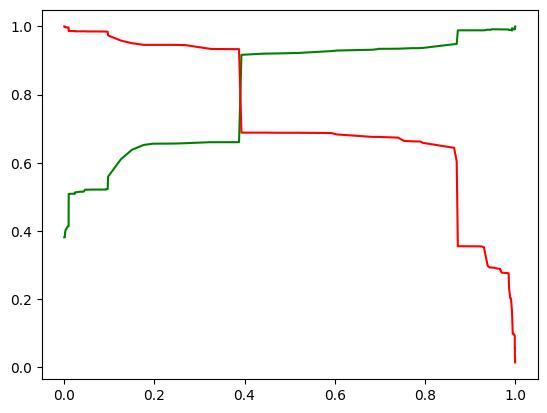

In [100]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

the cutoff is 0.38 from above precision and recall chart, lets check accuracy at cutoff 0.38

In [101]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.38 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted,Lead_Score
0,0,0.009991,1871,0,1,0,0,0,0,0,0,0,0,0,0,1
1,0,0.387825,6795,0,1,1,1,1,0,0,0,0,0,0,1,39
2,0,0.009991,3516,0,1,0,0,0,0,0,0,0,0,0,0,1
3,0,0.096606,8105,0,1,0,0,0,0,0,0,0,0,0,0,10
4,0,0.387825,3934,0,1,1,1,1,0,0,0,0,0,0,1,39


In [102]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.009991,1871,0,1
1,0,0.387825,6795,1,39
2,0,0.009991,3516,0,1
3,0,0.096606,8105,0,10
4,0,0.387825,3934,1,39


Let's check the overall accuracy.

In [103]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7917439703153989

In [104]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[2819, 1183],
       [ 164, 2302]])

In [105]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

Let's see the sensitivity of our logistic regression model

In [106]:
TP / float(TP+FN)

0.9334955393349554

Let us calculate specificity

In [107]:
TN / float(TN+FP)

0.7043978010994503

There is no change at 0.35 and 0.38 cutoff, so we can go by either on them.

Scaling test set

In [108]:
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Ac

In [109]:
X_test = X_test[rfe_cols]
X_test.head()

,Lead Origin_Lead Add Form,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Olark Chat Conversation,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Will revert after reading the email,Tags_in touch with EINS,Last Notable Activity_SMS Sent
4269,0,0,0,0,1,0,0,0,0,1,0,1
2376,1,0,0,0,1,0,0,0,0,1,0,1
7766,0,0,0,0,0,1,0,0,0,1,0,0
9199,0,0,0,1,1,0,0,0,0,0,0,0
4359,1,0,0,0,1,0,0,0,0,1,0,0


In [110]:
X_test_sm = sm.add_constant(X_test[rfe_cols])

##### PREDICTIONS ON TEST SET

In [111]:
y_test_pred = res.predict(X_test_sm)

In [112]:
y_test_pred[:10]

4269    0.870344
2376    0.985432
7766    0.930766
9199    0.001720
4359    0.864569
9186    0.870344
1631    0.387825
8963    0.387825
8007    0.150229
5324    0.870344
dtype: float64

Converting y_pred to a dataframe which is an array

In [113]:
y_pred_1 = pd.DataFrame(y_test_pred)

Let's see the head

In [114]:
y_pred_1.head()

,0
4269,0.870344
2376,0.985432
7766,0.930766
9199,0.001720
4359,0.864569


Converting y_test to dataframe

In [115]:
y_test_df = pd.DataFrame(y_test)

Putting CustID to index

In [116]:
y_test_df['Prospect ID'] = y_test_df.index

Removing index for both dataframes to append them side by side

In [117]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

Appending y_test_df and y_pred_1

In [118]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [119]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.870344
1,1,2376,0.985432
2,1,7766,0.930766
3,0,9199,0.001720
4,1,4359,0.864569


Renaming the column

In [120]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [121]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,1,4269,0.870344
1,1,2376,0.985432
2,1,7766,0.930766
3,0,9199,0.001720
4,1,4359,0.864569


Rearranging the columns

In [122]:
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

Let's see the head of y_pred_final

In [123]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,4269,1,0.870344,87
1,2376,1,0.985432,99
2,7766,1,0.930766,93
3,9199,0,0.001720,0
4,4359,1,0.864569,86


In [124]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.38 else 0)

In [125]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,4269,1,0.870344,87,1
1,2376,1,0.985432,99,1
2,7766,1,0.930766,93,1
3,9199,0,0.001720,0,0
4,4359,1,0.864569,86,1


Let's check the overall accuracy.

In [126]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7943722943722944

In [127]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1176,  501],
       [  69, 1026]])

In [128]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

Let's see the sensitivity of our logistic regression model

In [129]:
TP / float(TP+FN)

0.936986301369863

Let us calculate specificity

In [130]:
TN / float(TN+FP)

0.7012522361359571

In [131]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.6719056974459725

In [132]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.936986301369863

Final Observation:
Let us compare the values obtained for Train & Test:
   
Train Data:
    
Accuracy : 79.17%<br>
Sensitivity : 93.34%<br>
Specificity : 70.43%<br>

Test Data:
Accuracy : 79.43%<br>
Sensitivity : 93.69%<br>
Specificity : 70.12%<br>
    
The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model

Probabilty Threshold/cutoff

Final Features:

Lead Origin_Lead Add Form                                
Do Not Email_Yes                                        
Last Activity_Converted to Lead                         
Last Activity_Olark Chat Conversation                   
What is your current occupation_Unemployed              
What is your current occupation_Working Professional    
Tags_Busy                                               
Tags_Closed by Horizzon                                 
Tags_Lost to EINS                                       
Tags_Will revert after reading the email                
Tags_in touch with EINS                                 
Last Notable Activity_SMS Sent